<a href="https://colab.research.google.com/github/abhishekalandikar/Loan-Default-Prediction/blob/main/Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the libaries

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = pd.read_csv('Loan.csv')
print(data)

            ID  year loan_limit             Gender approv_in_adv loan_type  \
0        24890  2019         cf  Sex Not Available         nopre     type1   
1        24891  2019         cf               Male         nopre     type2   
2        24892  2019         cf               Male           pre     type1   
3        24893  2019         cf               Male         nopre     type1   
4        24894  2019         cf              Joint           pre     type1   
...        ...   ...        ...                ...           ...       ...   
148665  173555  2019         cf  Sex Not Available         nopre     type1   
148666  173556  2019         cf               Male         nopre     type1   
148667  173557  2019         cf               Male         nopre     type1   
148668  173558  2019         cf             Female         nopre     type1   
148669  173559  2019         cf             Female         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_c

In [ ]:
data.shape

(148670, 34)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [ ]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [ ]:
data.count()

ID                           148670
year                         148670
loan_limit                   145326
Gender                       148670
approv_in_adv                147762
loan_type                    148670
loan_purpose                 148536
Credit_Worthiness            148670
open_credit                  148670
business_or_commercial       148670
loan_amount                  148670
rate_of_interest             112231
Interest_rate_spread         112031
Upfront_charges              109028
term                         148629
Neg_ammortization            148549
interest_only                148670
lump_sum_payment             148670
property_value               133572
construction_type            148670
occupancy_type               148670
Secured_by                   148670
total_units                  148670
income                       139520
credit_type                  148670
Credit_Score                 148670
co-applicant_credit_type     148670
age                         

In [ ]:
def count_features(data):
    #Getting column with objects dtype
    objects= data.select_dtypes(include=['object']).columns
    numerical=data.select_dtypes(include=['int64']).columns
    floating=data.select_dtypes(include=['float64']).columns

    print('Numerical features are :',len(numerical))
    print('Objects features are  :',len(objects))
    print('Floating features are :',len(floating))

count_features(data)

Numerical features are : 5
Objects features are  : 21
Floating features are : 8


In [ ]:
# Checking count of Eligibility by gender
gender_status=data.groupby(['Gender','Status']).size().reset_index().rename(columns={0:'Total Count'})
gender_status

,Gender,Status,Total Count
0,Female,0,20418
1,Female,1,6848
2,Joint,0,33466
3,Joint,1,7933
4,Male,0,31255
5,Male,1,11091
6,Sex Not Available,0,26892
7,Sex Not Available,1,10767


<Axes: xlabel='Gender', ylabel='Total Count'>

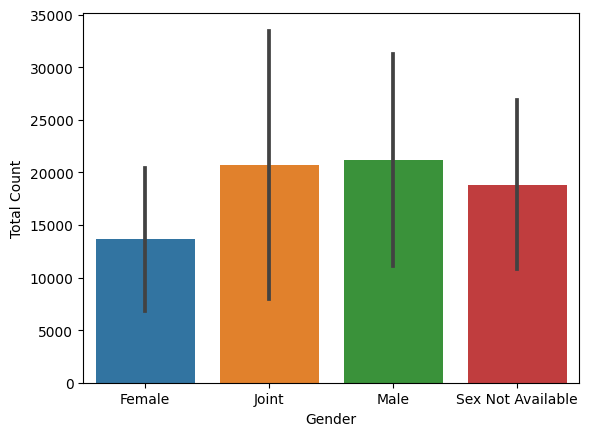

In [ ]:
import seaborn as sns
sns.barplot(x='Gender',y='Total Count',data=gender_status)


In [ ]:
data.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

UNIQUE VALUES FOR Object Features

In [ ]:
def count_unique_values(data):
    objects = data.select_dtypes(include=['object']).columns
    for col in objects:
        unique = data[col].value_counts()
        print(unique, '\n')
        print('*'*50)
count_unique_values(data)

cf     135348
ncf      9978
Name: loan_limit, dtype: int64 

**************************************************
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64 

**************************************************
nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64 

**************************************************
type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64 

**************************************************
p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64 

**************************************************
l1    142344
l2      6326
Name: Credit_Worthiness, dtype: int64 

**************************************************
nopc    148114
opc        556
Name: open_credit, dtype: int64 

**************************************************
nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64 

*******

integer values of columns

In [ ]:
def count_unique_values(data):
    objects = data.select_dtypes(include=['int64']).columns
    for col in objects:
        unique = data[col].value_counts()
        print(unique, '\n')
        print('*'*50)
count_unique_values(data)

24890     1
123979    1
123999    1
124000    1
124001    1
         ..
74447     1
74448     1
74449     1
74450     1
173559    1
Name: ID, Length: 148670, dtype: int64 

**************************************************
2019    148670
Name: year, dtype: int64 

**************************************************
206500     4610
256500     4079
156500     3967
226500     3944
486500     3819
           ... 
2206500       1
1746500       1
2396500       1
3576500       1
1956500       1
Name: loan_amount, Length: 211, dtype: int64 

**************************************************
763    415
867    413
639    411
581    408
554    407
      ... 
745    330
573    330
743    327
748    324
559    321
Name: Credit_Score, Length: 401, dtype: int64 

**************************************************
0    112031
1     36639
Name: Status, dtype: int64 

**************************************************


Float values of columns

In [ ]:
def count_unique_values(data):
    objects = data.select_dtypes(include=['float64']).columns
    for col in objects:
        unique = data[col].value_counts()
        print(unique, '\n')
        print('*'*50)
count_unique_values(data)

3.990    14455
3.625     8800
3.875     8592
3.750     8474
3.500     6866
         ...  
4.700        1
8.000        1
7.750        1
5.300        1
2.700        1
Name: rate_of_interest, Length: 131, dtype: int64 

**************************************************
-0.0280    77
-0.0380    64
-0.0230    60
-0.1730    56
-0.1480    52
           ..
-0.1791     1
 1.5268     1
 1.3850     1
 1.4201     1
-0.3247     1
Name: Interest_rate_spread, Length: 22516, dtype: int64 

**************************************************
0.00       20770
1250.00     1184
1150.00      892
795.00       487
295.00       403
           ...  
4447.72        1
3173.84        1
3421.81        1
198.96         1
4323.33        1
Name: Upfront_charges, Length: 58271, dtype: int64 

**************************************************
360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
15

([<matplotlib.patches.Wedge at 0x7a30edcc8100>,
 [Text(-0.008995408754127082, 1.099963218758403, 'North'),
  Text(-0.22036708868183472, -1.077700490036955, 'south'),
  Text(1.0695159326560089, -0.2571685629989551, 'central'),
  Text(1.0996254343670884, -0.028703729600740396, 'North-East')],
 [Text(-0.004906586593160226, 0.5999799375045834, '50.26%'),
  Text(-0.12020023019009166, -0.587836630929248, '43.06%'),
  Text(0.5833723269032776, -0.14027376163579366, '5.85%'),
  Text(0.5997956914729572, -0.01565657978222203, '0.83%')])

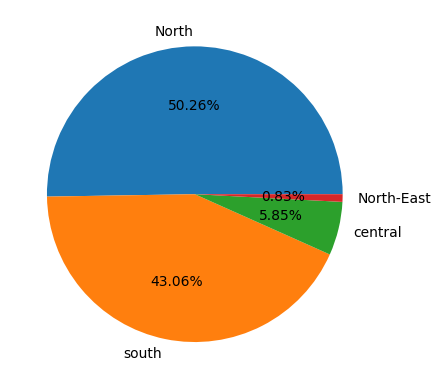

In [ ]:
import matplotlib.pyplot as plt

region_names=data.Region.value_counts().index
region_val=data.Region.value_counts().values
plt.pie(region_val,labels=region_names[:],autopct='%1.2f%%')

Observations

1) Most of the people are from North and South side

2) Very less people are from North-east side

DATA PREPROCESSING

In [ ]:
def plot_missing_vals(data,height):
    #this function plots missing values as bars and appends text of missing values on the bar#
    f,ax = plt.subplots(1,1,figsize=(25,10))
    na_df = pd.DataFrame(data.isna().sum()).reset_index()
    na_df.columns=['Columns','Missing Values']
    sns.barplot(data=na_df, x='Columns',y='Missing Values',edgecolor='white', linewidth=3,palette='dark')
    ax.tick_params('x',labelrotation=90)
    for i in na_df.index:
        ax.text(x=i,y=na_df['Missing Values'][i]+height, s=na_df['Missing Values'][i],ha="center", va="center", color="black",rotation=25,size=14)
    f.suptitle('Plot Of Missing Value',y=0.98,ha='center',va='center',size=15, weight=150)
    plt.show()

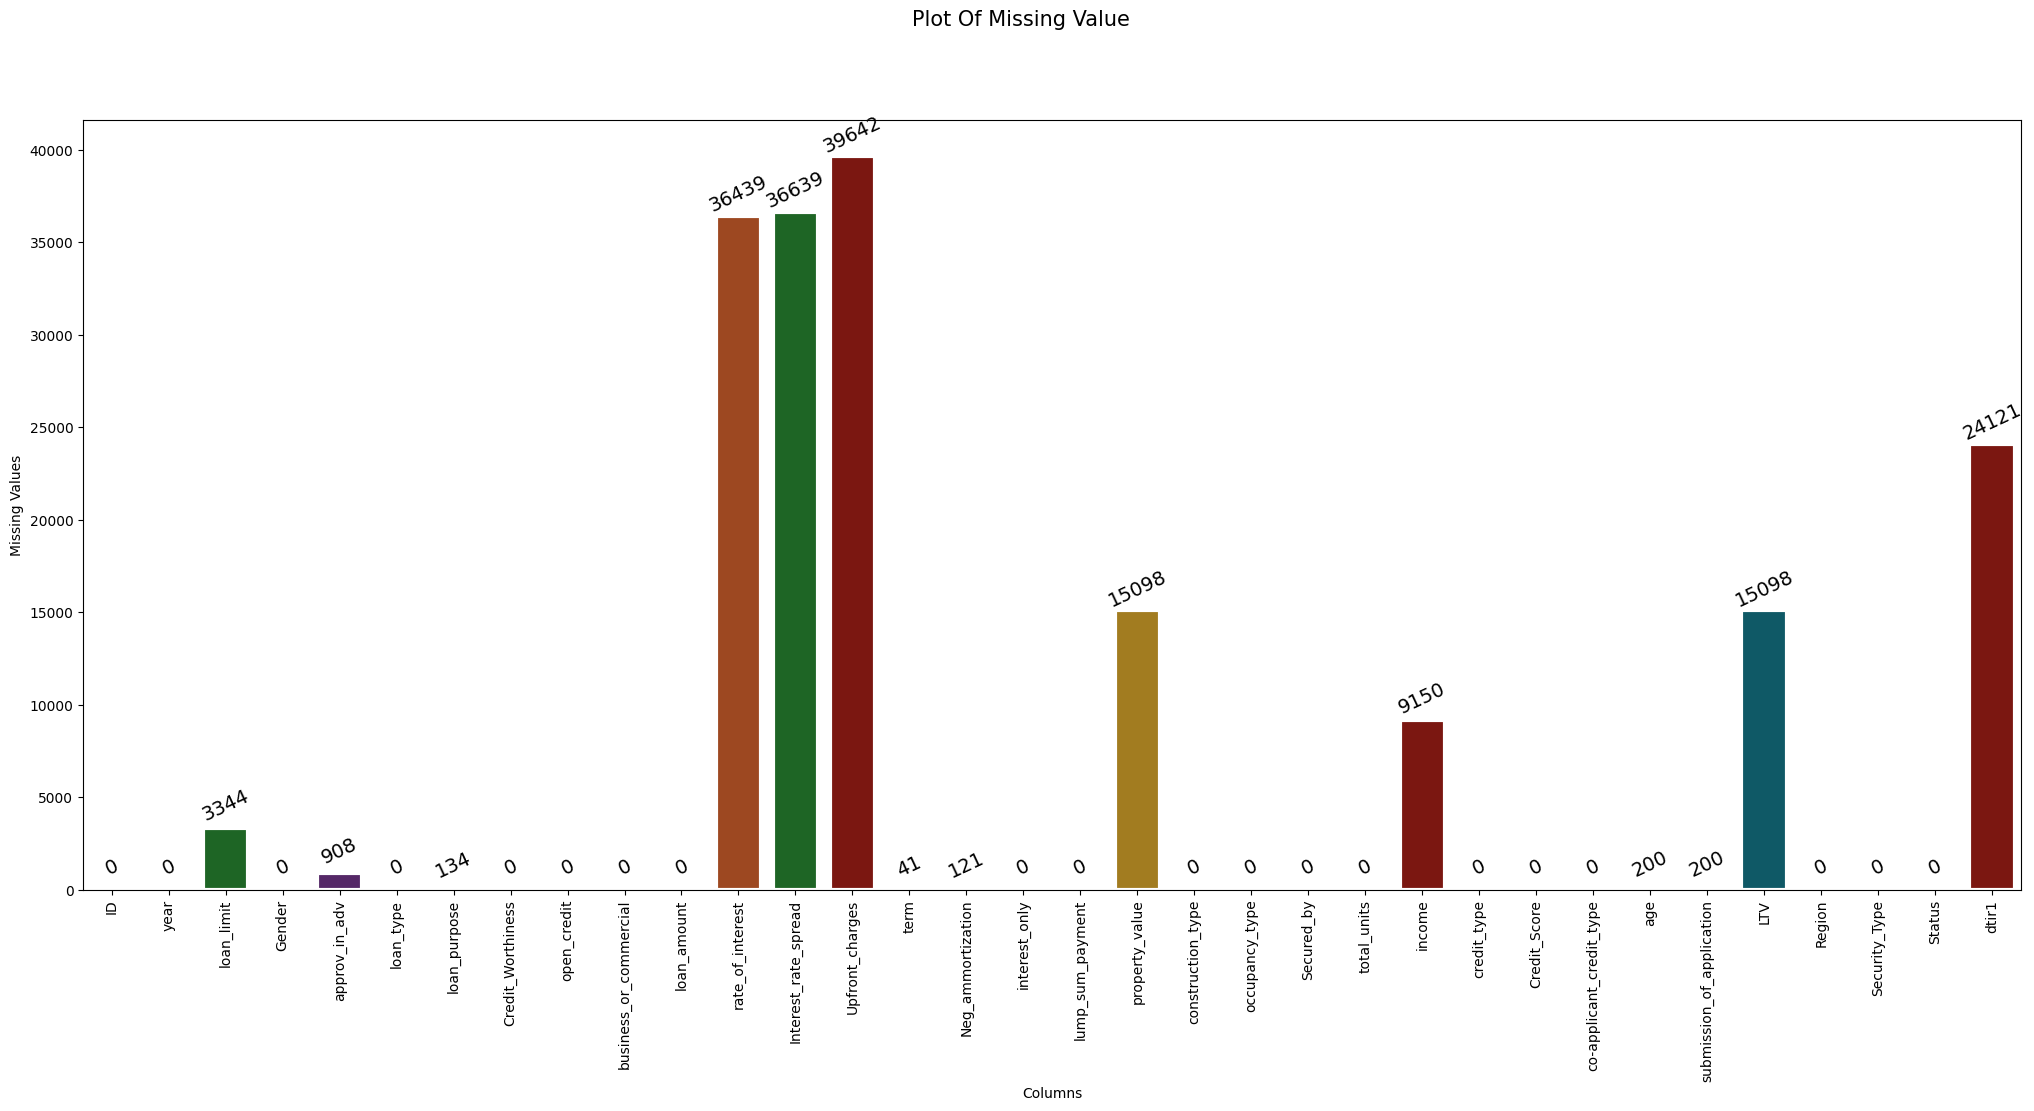

In [ ]:
plot_missing_vals(data,1200)

In [ ]:
def replace_na(df):
    '''This function replaces null value in the dataset with the mode'''

    na_cols = [cols for cols in df.columns]
    for cols in na_cols:
        md = df[cols].mode()[0]
        df[cols] = df[cols].fillna(md)
    return df


In [ ]:
data = replace_na(data)

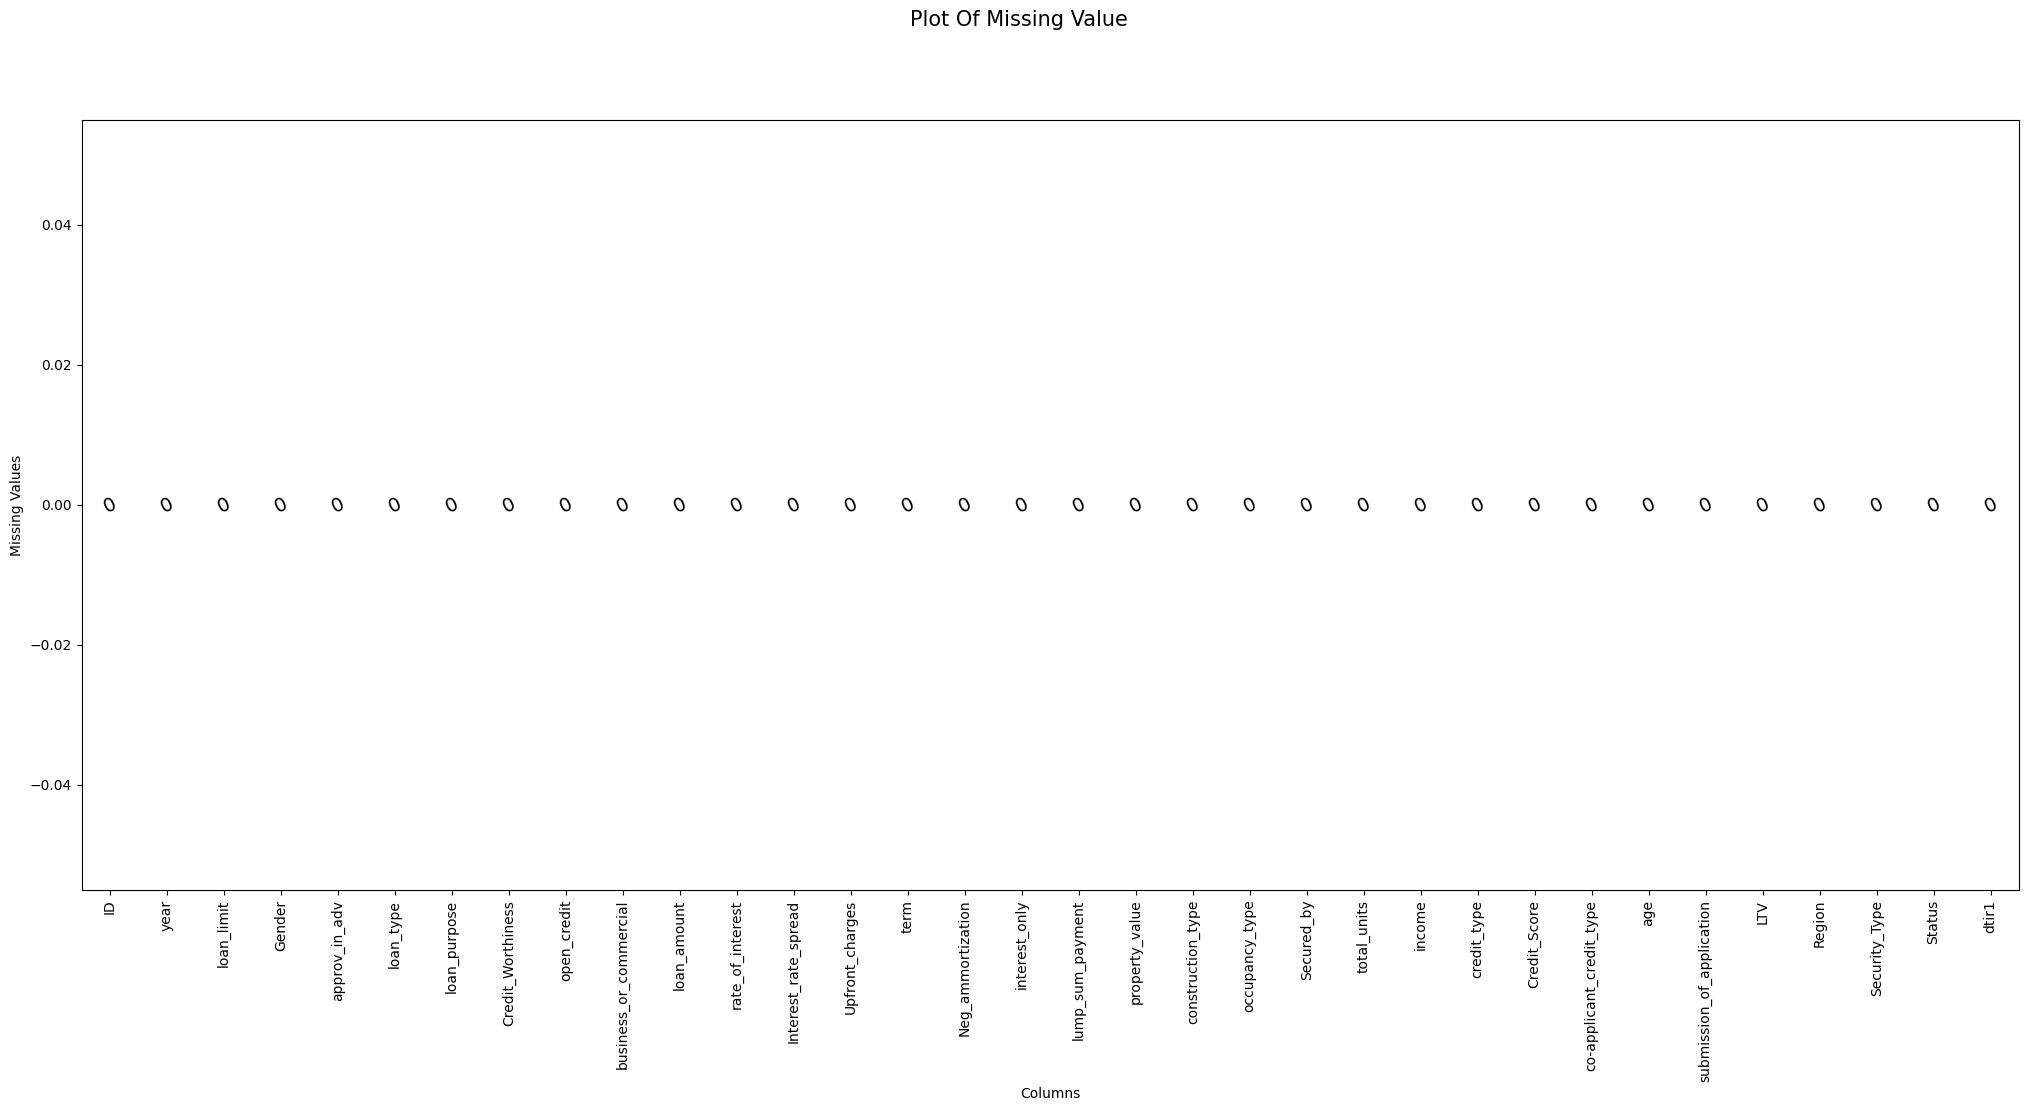

In [ ]:
plot_missing_vals(data,0)

In [ ]:
def plot_targetcol(data,col):
    '''
    This function plots the target column with the distributions as both pie and barcharts
    '''
    color = ['Red', 'lightskyblue']
    f,ax= plt.subplots(1,2,figsize=(20,5))
    sns.countplot(data = data, x=col, ax=ax[1],palette='dark',edgecolor='white', linewidth=4)
    data.Status.value_counts().plot.pie(autopct='%.2f%%',explode=[0,0.05], ax=ax[0],colors=color,shadow = 'True',
            startangle = 40,
            textprops = {'color': 'White','fontsize':12},
            wedgeprops = {'linewidth':3,'edgecolor':'white'},
            rotatelabels = 'true')
    ax[1].text(x=0,y=100000,s=data[col].value_counts()[0], color='white', va='center', ha='center')
    ax[1].text(x=1,y=25000,s=data[col].value_counts()[1], color='white', va='center', ha='center')
    f.suptitle('Target Column Distribution',y=0.98,ha='center',va='center',size=15, weight=150)
    plt.show()

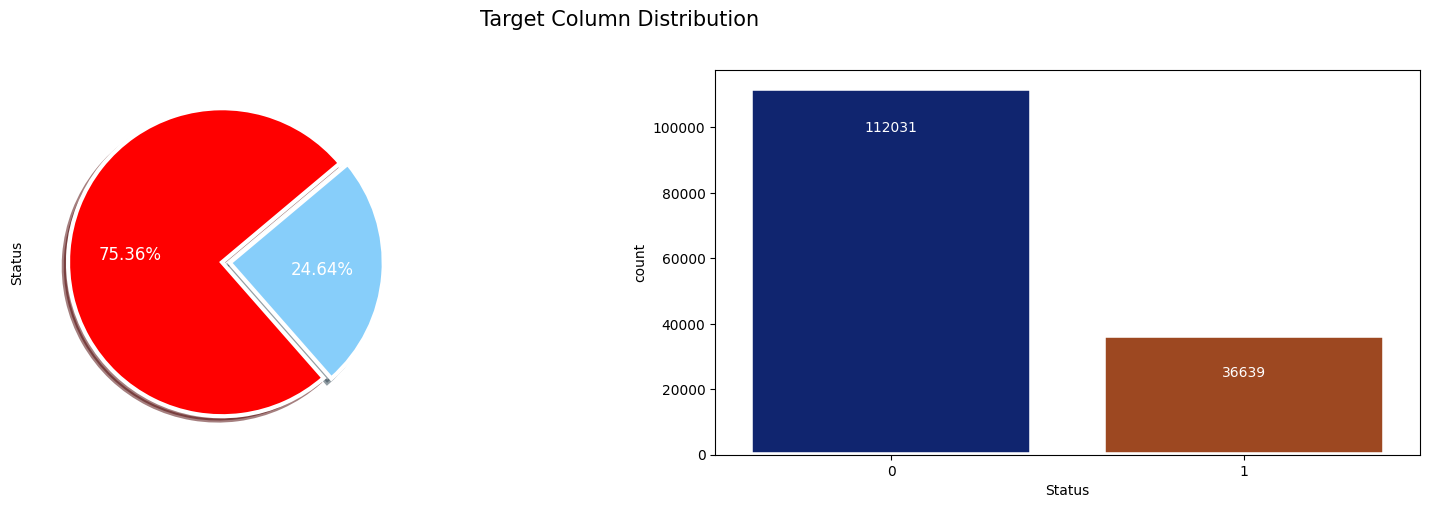

In [ ]:
plot_targetcol(data,'Status')

From these graphs we can say that

1) Out of 148670, 112031(i.e 75 %) people have successfully repaid the loan

2) And there are 36639 (i.e 24) people have not paid loan amount

Distribution and relationship between numerical and target value

In [ ]:
numerical = [feature for feature in data.columns if data[feature].dtype != 'object']
numerical

['ID',
 'year',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

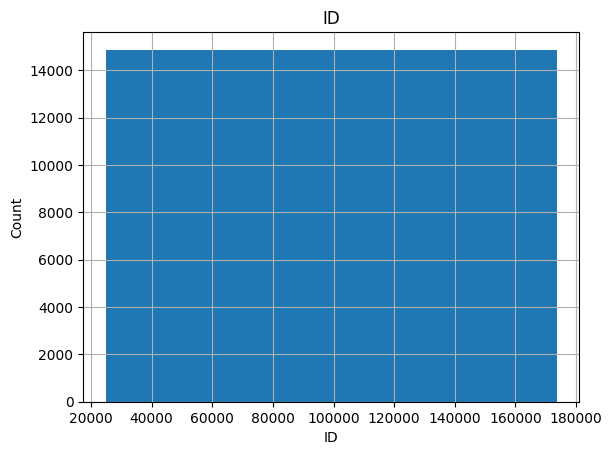

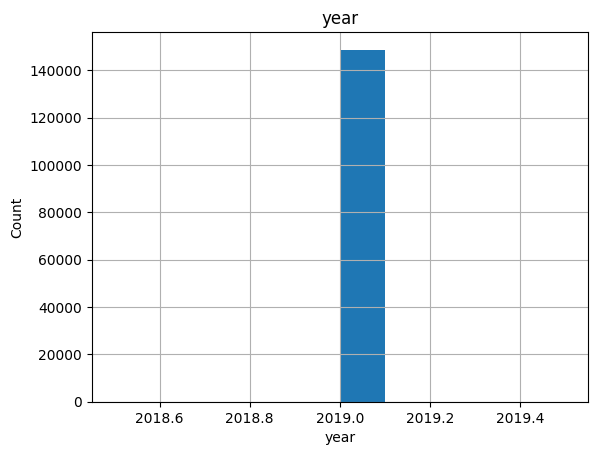

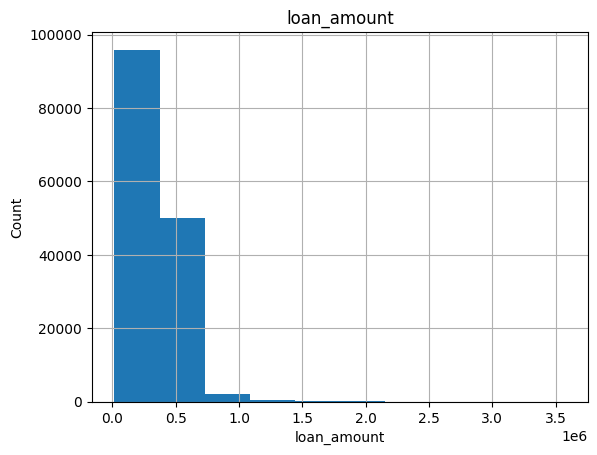

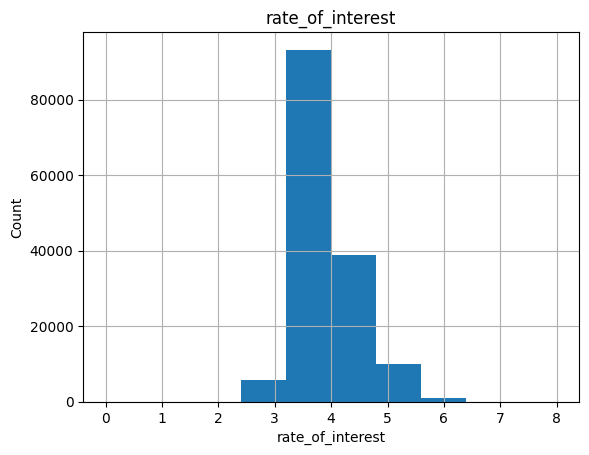

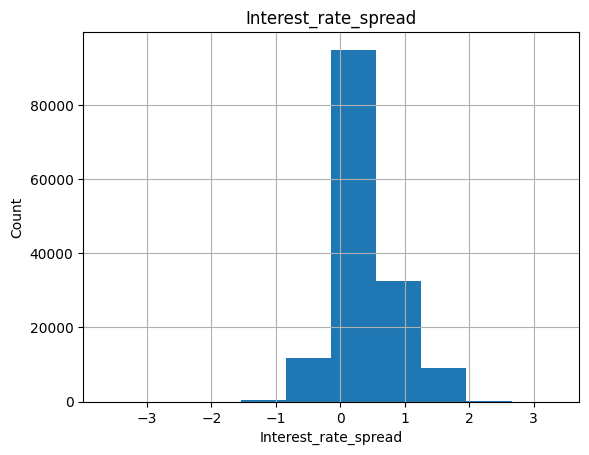

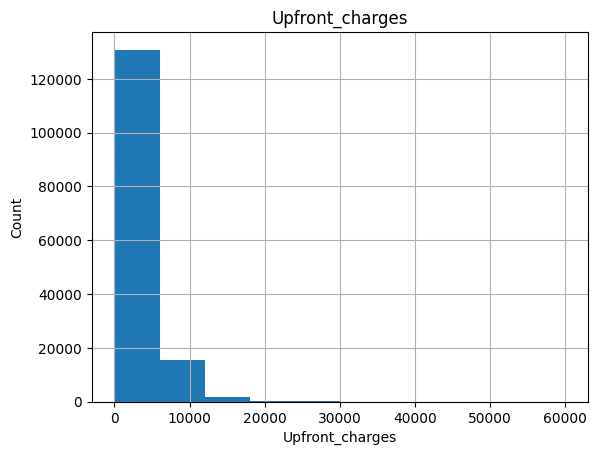

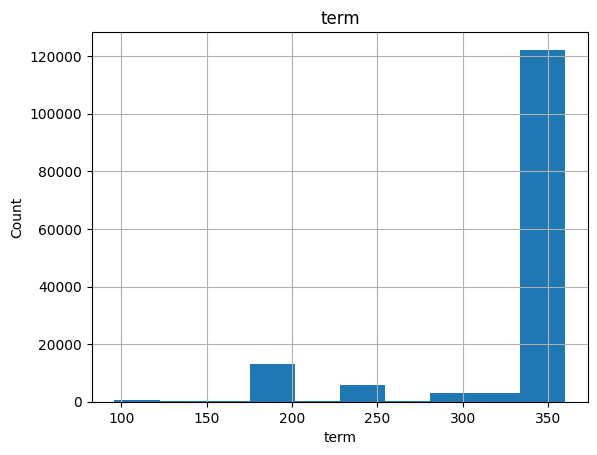

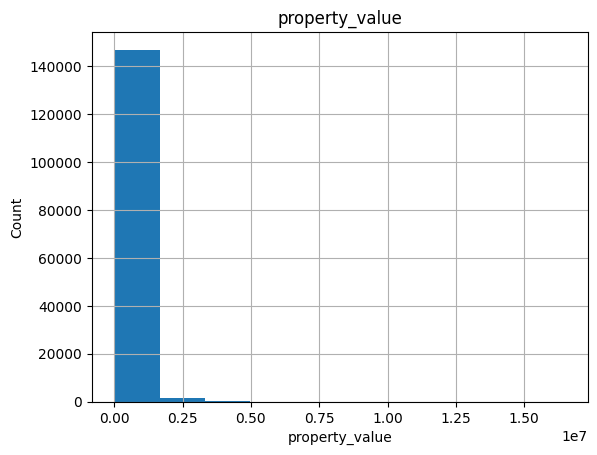

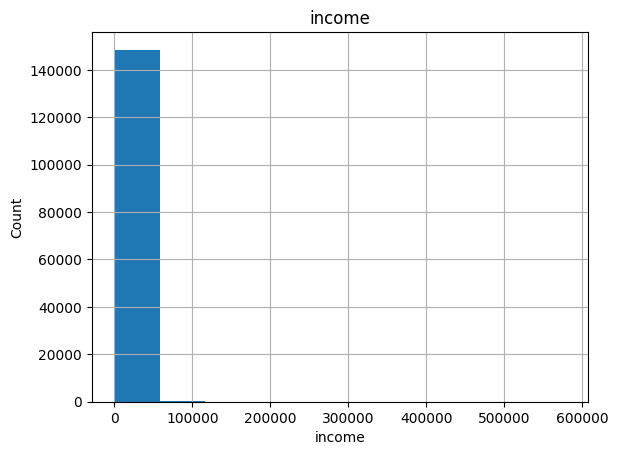

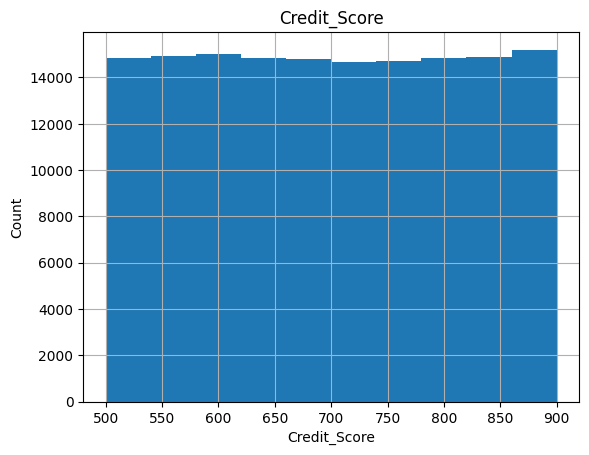

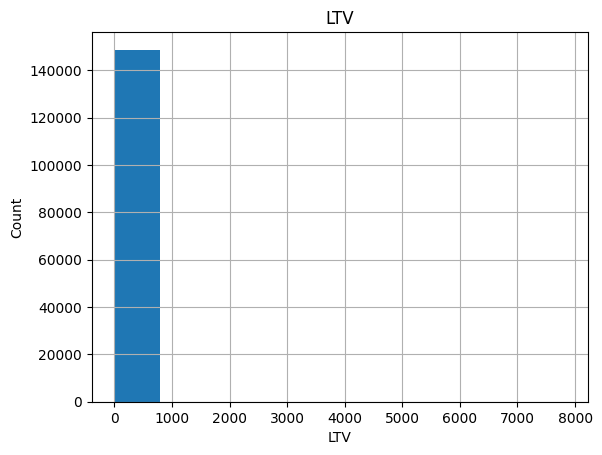

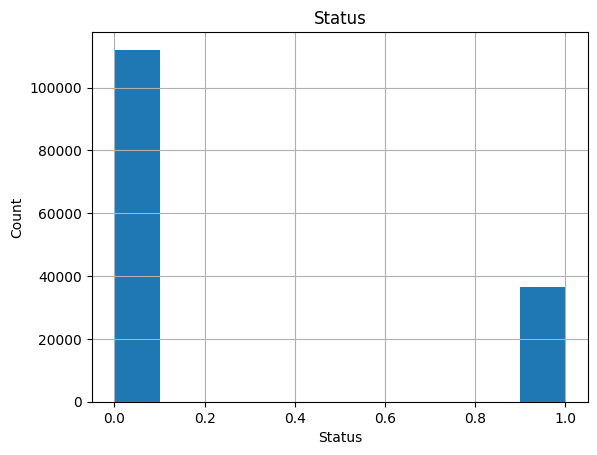

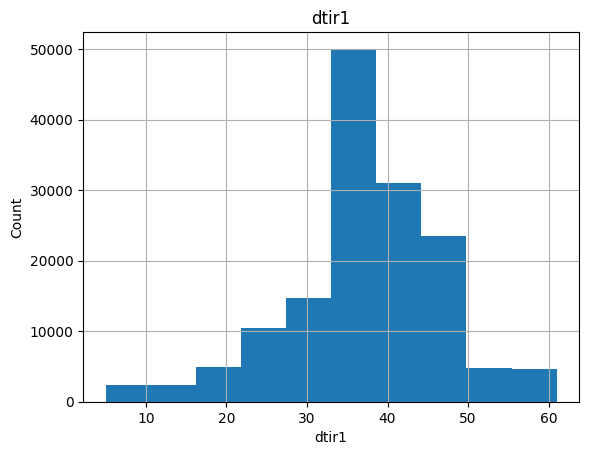

In [ ]:
for feature in numerical:
    data[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

From this distribution we can highly see that our data is skewed as its distribution is unbalanced

In [ ]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

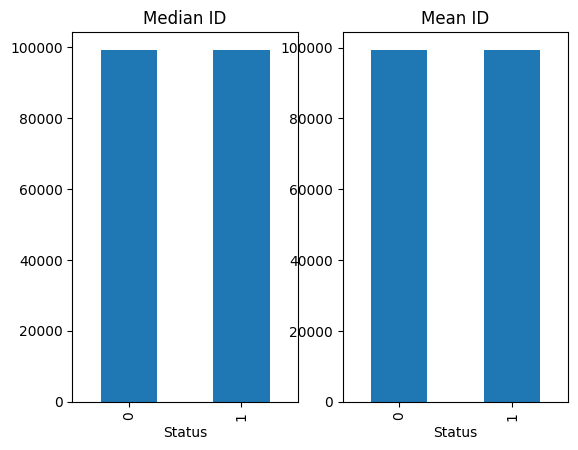

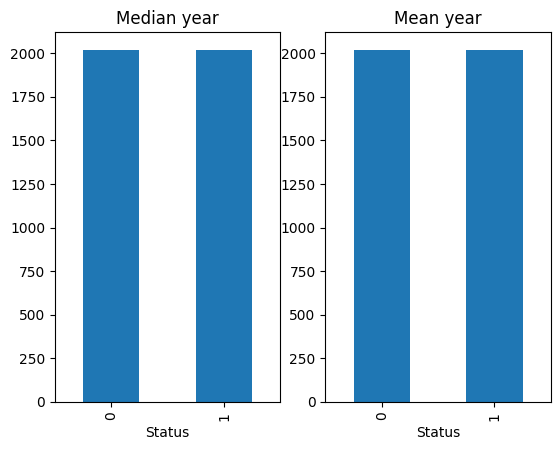

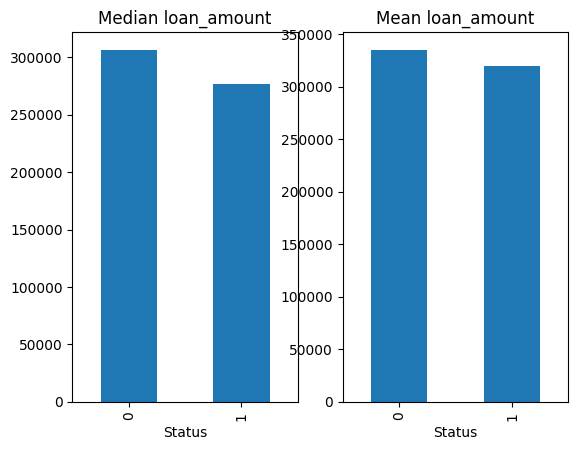

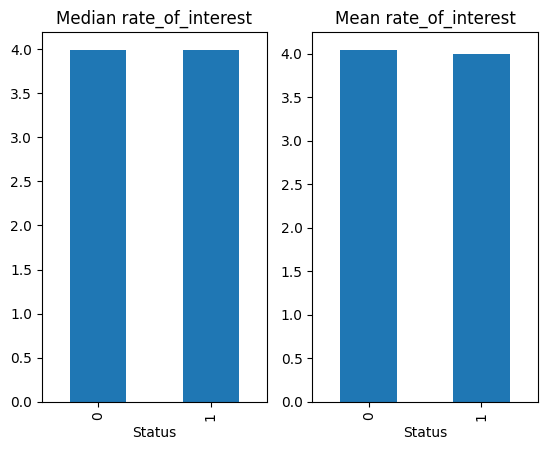

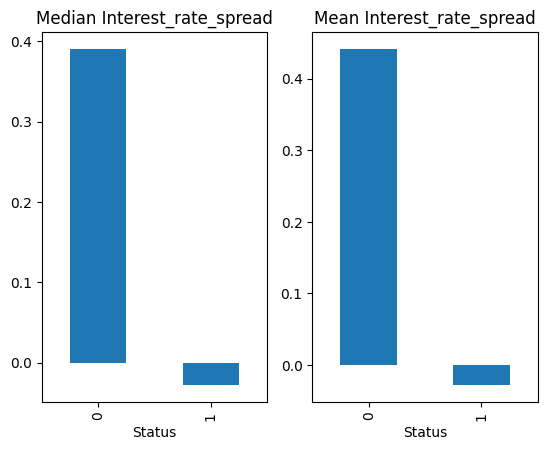

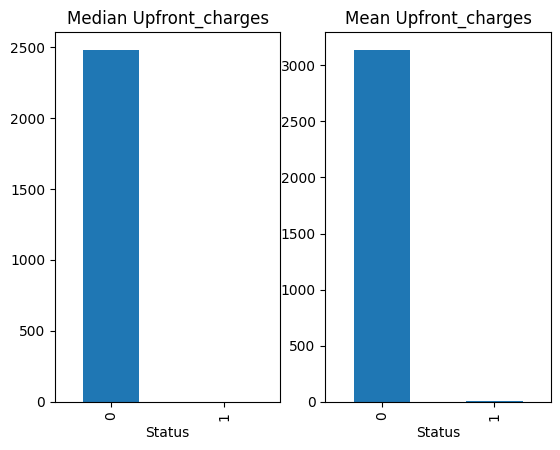

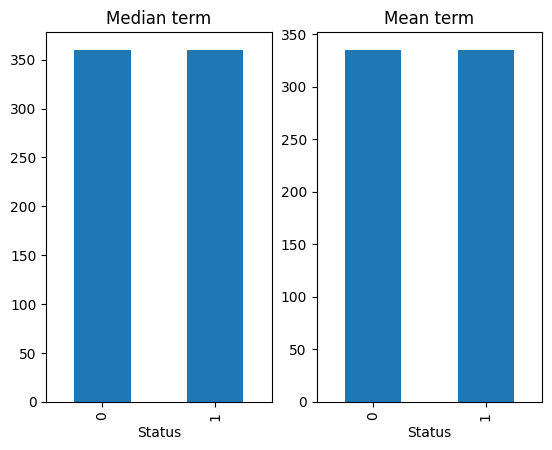

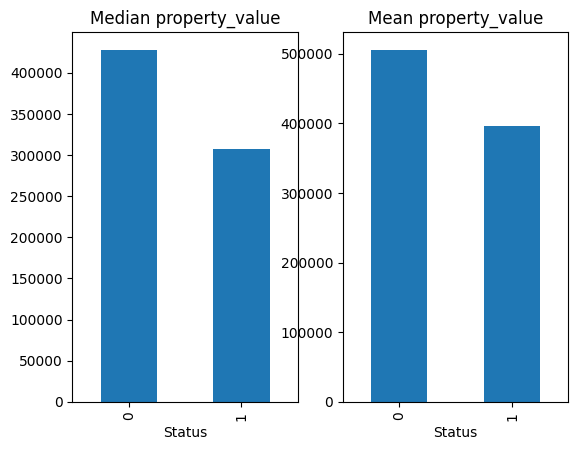

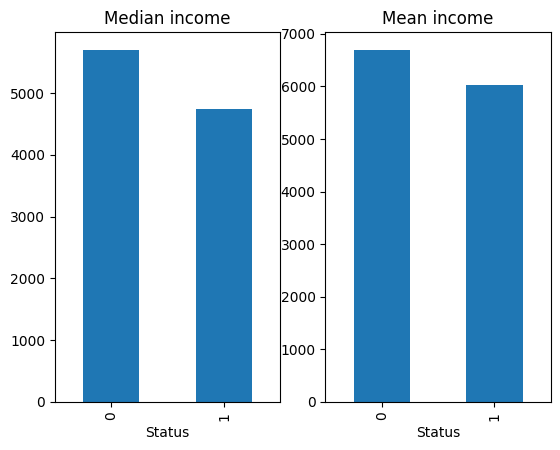

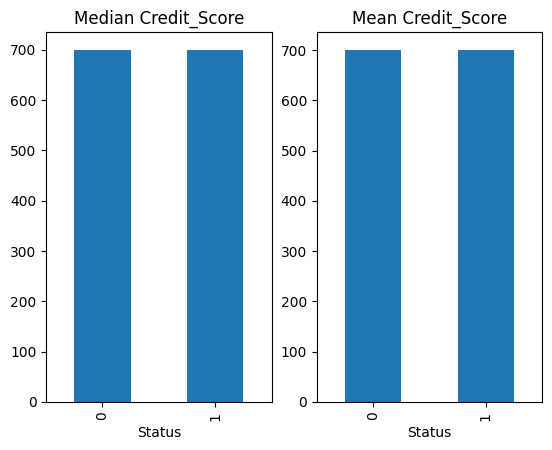

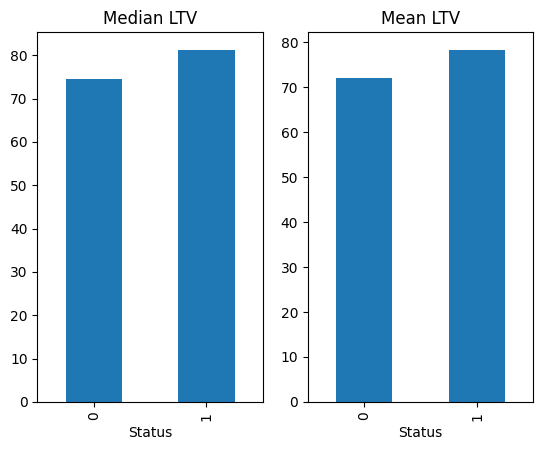

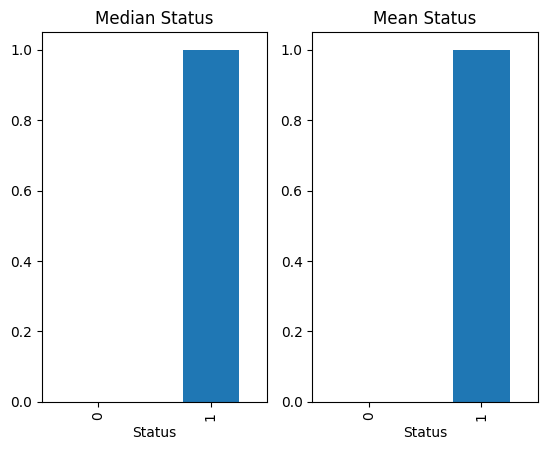

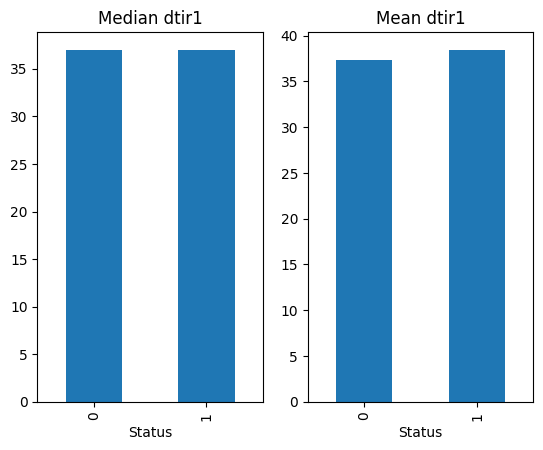

In [ ]:
for i in numerical:
    plt.subplot(1, 2, 1)
    data.groupby('Status')[i].median().plot.bar()
    plt.title('Median '+i)

    plt.subplot(1, 2, 2)
    data.groupby('Status')[i].mean().plot.bar()
    plt.title('Mean '+i)

    plt.show()

In [ ]:
from scipy.stats import zscore
for i in numerical:
  print(i, ' -> ', len(data[abs(zscore(data[i]))>3.5]), ' items more than z-score 3.5')


ID  ->  0  items more than z-score 3.5
year  ->  0  items more than z-score 3.5
loan_amount  ->  911  items more than z-score 3.5
rate_of_interest  ->  566  items more than z-score 3.5
Interest_rate_spread  ->  16  items more than z-score 3.5
Upfront_charges  ->  1469  items more than z-score 3.5
term  ->  737  items more than z-score 3.5
property_value  ->  1657  items more than z-score 3.5
income  ->  1085  items more than z-score 3.5
Credit_Score  ->  0  items more than z-score 3.5
LTV  ->  10  items more than z-score 3.5
Status  ->  0  items more than z-score 3.5
dtir1  ->  0  items more than z-score 3.5


In [ ]:
skewed = [i for i in numerical if len(data[abs(zscore(data[i]))>3.5])>50]
skewed

['loan_amount',
 'rate_of_interest',
 'Upfront_charges',
 'term',
 'property_value',
 'income']

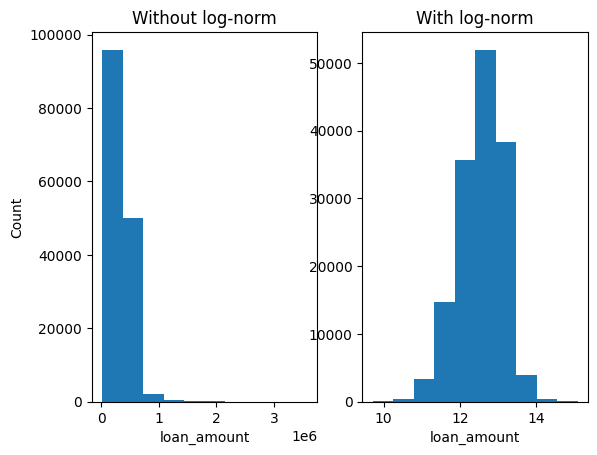

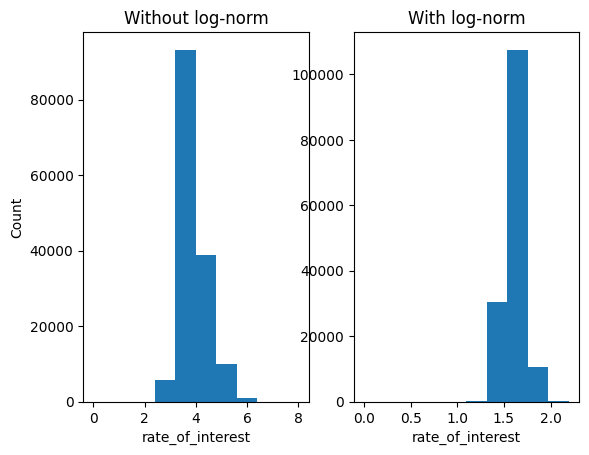

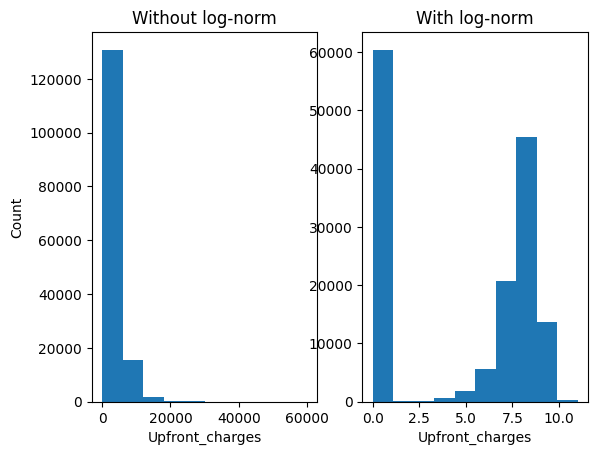

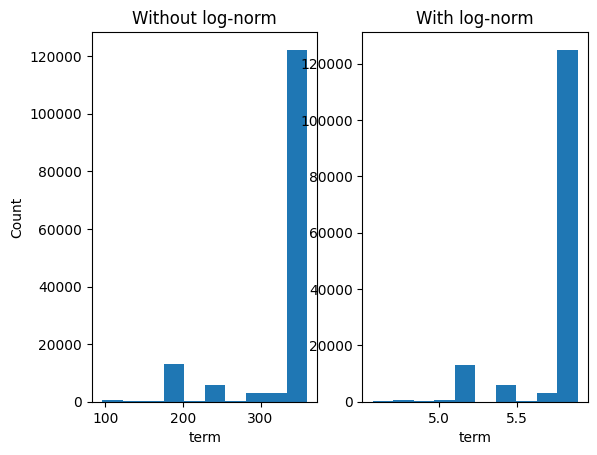

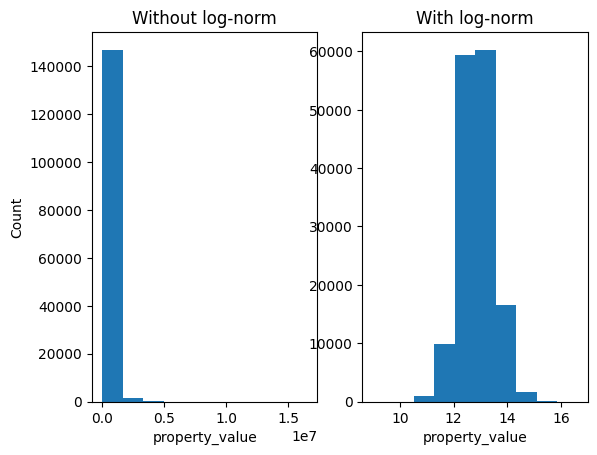

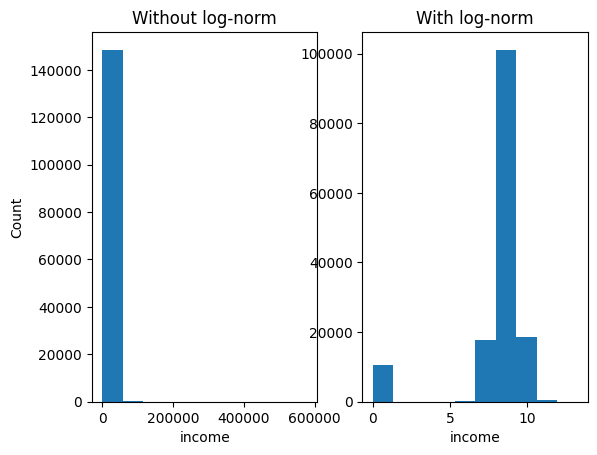

In [ ]:
for i in skewed:
    plt.subplot(1, 2, 1)
    plt.hist(data[i])
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title("Without log-norm")

    plt.subplot(1, 2, 2)
    #We are adding 1 to all the values so we can log-transform, because log(0) will throw error
    plt.hist(np.log(data[i]+1))
    plt.xlabel(i)
    plt.title('With log-norm')

    plt.show()

In [ ]:
print('Outliers Without log-norm  ',len(data[zscore((data['loan_amount']))>3.5]))
print('Outliers with log-norm  ',len(data[zscore(np.log(data['loan_amount']))>3.5]))

Outliers Without log-norm   911
Outliers with log-norm   28


As we can see from this that by using log-norm outliers have been drastically reduced.

In [ ]:
#Need to define a function to bypass the zeros
def log_transform(x):
  if x == 0:
    return 0
  else:
    return np.log(x)

for i in skewed:
  data[i] = data[i].apply(log_transform)

for i in skewed:
  print(i, ' -> ', len(data[abs(zscore(data[i]))>3.5]), ' items more than z-score 3.5')

loan_amount  ->  177  items more than z-score 3.5
rate_of_interest  ->  296  items more than z-score 3.5
Upfront_charges  ->  0  items more than z-score 3.5
term  ->  1093  items more than z-score 3.5
property_value  ->  311  items more than z-score 3.5
income  ->  10410  items more than z-score 3.5


In [ ]:
for i in skewed:
  print(i, ' -> ', len(data[abs(zscore(data[i]))>4]), ' items more than z-score 4')

loan_amount  ->  38  items more than z-score 4
rate_of_interest  ->  24  items more than z-score 4
Upfront_charges  ->  0  items more than z-score 4
term  ->  830  items more than z-score 4
property_value  ->  77  items more than z-score 4
income  ->  0  items more than z-score 4


In [ ]:
data[abs(zscore(data['loan_amount']))<3.5]

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [ ]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
for i in skewed:
  data = data[abs(zscore(data[i]))<3.5]

data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
len(data)

146872

In [ ]:
data.shape

(146872, 34)

Categorical

In [ ]:
categorical = [i for i in data.columns if data[i].dtype == 'object']
categorical

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [ ]:
for i in categorical:
    print(i,'\t\t',data[i].nunique(),'\t\t',data[i].unique())

loan_limit 		 2 		 ['cf' 'ncf']
Gender 		 4 		 ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv 		 2 		 ['nopre' 'pre']
loan_type 		 3 		 ['type1' 'type2' 'type3']
loan_purpose 		 4 		 ['p1' 'p4' 'p3' 'p2']
Credit_Worthiness 		 2 		 ['l1' 'l2']
open_credit 		 2 		 ['nopc' 'opc']
business_or_commercial 		 2 		 ['nob/c' 'b/c']
Neg_ammortization 		 2 		 ['not_neg' 'neg_amm']
interest_only 		 2 		 ['not_int' 'int_only']
lump_sum_payment 		 2 		 ['not_lpsm' 'lpsm']
construction_type 		 2 		 ['sb' 'mh']
occupancy_type 		 3 		 ['pr' 'sr' 'ir']
Secured_by 		 2 		 ['home' 'land']
total_units 		 4 		 ['1U' '2U' '3U' '4U']
credit_type 		 4 		 ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type 		 2 		 ['CIB' 'EXP']
age 		 7 		 ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']
submission_of_application 		 2 		 ['to_inst' 'not_inst']
Region 		 4 		 ['south' 'North' 'central' 'North-East']
Security_Type 		 2 		 ['direct' 'Indriect']


In [ ]:
for i in categorical:
    if data[i].nunique() == 2:
        data[i].replace([i for i in data[i].unique() if not pd.isna(i)],[0,1],inplace=True)
for i in categorical:
    print(i,'\t\t',data[i].nunique(),'\t\t',data[i].unique())

loan_limit 		 2 		 [0 1]
Gender 		 4 		 ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv 		 2 		 [0 1]
loan_type 		 3 		 ['type1' 'type2' 'type3']
loan_purpose 		 4 		 ['p1' 'p4' 'p3' 'p2']
Credit_Worthiness 		 2 		 [0 1]
open_credit 		 2 		 [0 1]
business_or_commercial 		 2 		 [0 1]
Neg_ammortization 		 2 		 [0 1]
interest_only 		 2 		 [0 1]
lump_sum_payment 		 2 		 [0 1]
construction_type 		 2 		 [0 1]
occupancy_type 		 3 		 ['pr' 'sr' 'ir']
Secured_by 		 2 		 [0 1]
total_units 		 4 		 ['1U' '2U' '3U' '4U']
credit_type 		 4 		 ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type 		 2 		 [0 1]
age 		 7 		 ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']
submission_of_application 		 2 		 [0 1]
Region 		 4 		 ['south' 'North' 'central' 'North-East']
Security_Type 		 2 		 [0 1]


In [ ]:
def calc_mean_age(age_range):
  # for age >74 we will replace it as 80 directly
  # for age <25 we will replace it as 20 directly

  if pd.isna(age_range):
    return np.nan

  if age_range == '>74':
    return 80

  if age_range == '<25':
    return 20

  age = age_range.split('-')
  age = [int(i) for i in age]
  mean_age = int(sum(age)/len(age))
  return mean_age

data['age'] = data['age'].apply(calc_mean_age)
data.age

0         29
1         59
2         39
3         49
4         29
          ..
148665    59
148666    29
148667    49
148668    59
148669    49
Name: age, Length: 146872, dtype: int64

In [ ]:
data['total_units'] = data['total_units'].apply(lambda x: int(x[0]) )
data['total_units'].unique()

array([1, 2, 3, 4])

In [ ]:
data.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [ ]:
numerical = [feature for feature in data.columns if (data[feature].dtype != 'object' and data[feature].nunique()>5)]
numerical

['ID',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'age',
 'LTV',
 'dtir1']

In [ ]:
numerical.append('total_units')
numerical

['ID',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'age',
 'LTV',
 'dtir1',
 'total_units']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_eng = pd.DataFrame()
df_eng[numerical] = scaler.fit_transform(data[numerical])
df_eng.head()

,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,age,LTV,dtir1,total_units
0,-1.731590,-1.585053,-0.027380,-0.723178,-1.184341,0.408392,-2.099468,-0.249037,0.502170,-1.497350,1.406197,0.761658,-0.109555
1,-1.731567,-0.574140,-0.027380,-0.723178,-1.184341,0.408392,-0.446041,0.208523,-1.275282,0.607315,0.424872,-0.067952,-0.109555
2,-1.731544,0.621988,1.100319,-0.254835,0.426068,0.408392,0.416302,0.488641,1.157929,-0.795795,0.355798,0.865359,-0.109555
3,-1.731520,0.826860,0.505746,0.733203,-1.184341,0.408392,0.862178,0.586838,-0.973288,-0.094240,-0.241727,0.450554,-0.109555
4,-1.731497,1.572986,-0.006241,-0.040795,-1.184341,0.408392,1.105997,0.530614,-0.843862,-1.497350,1.022047,0.139450,-0.109555


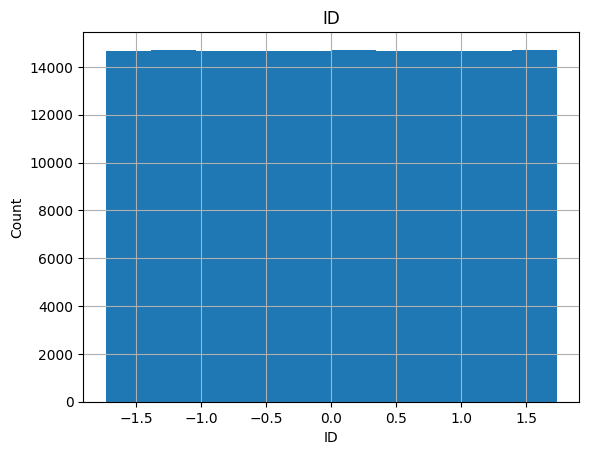

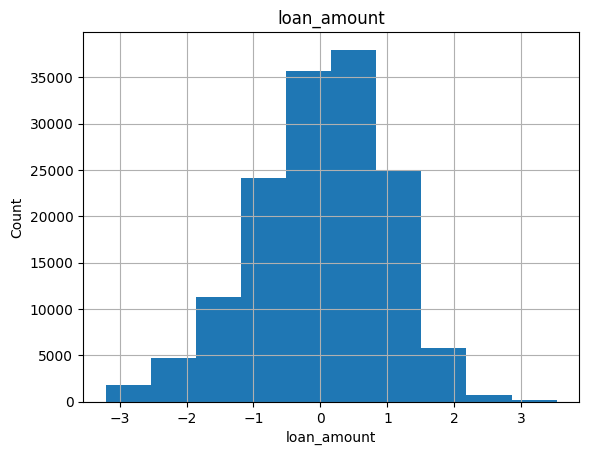

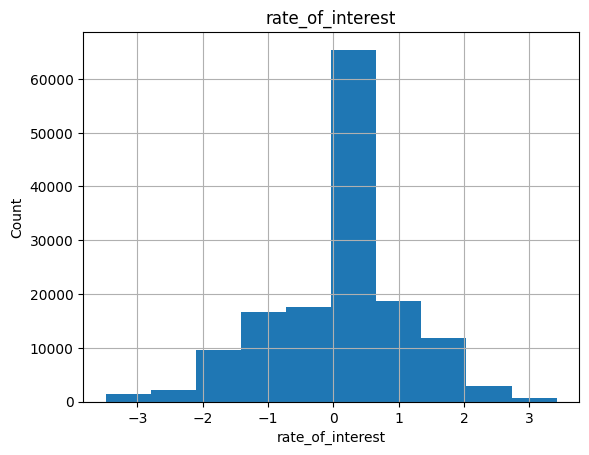

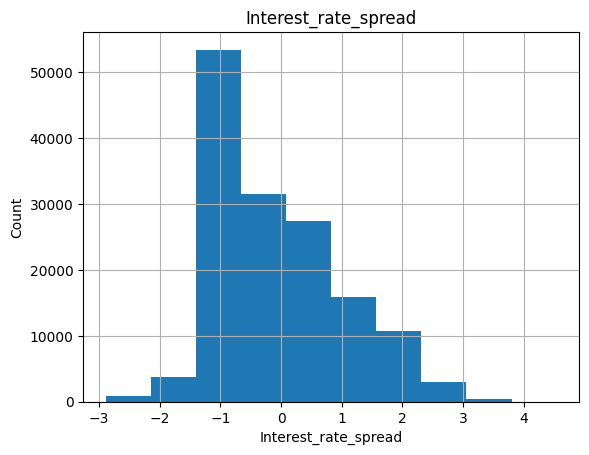

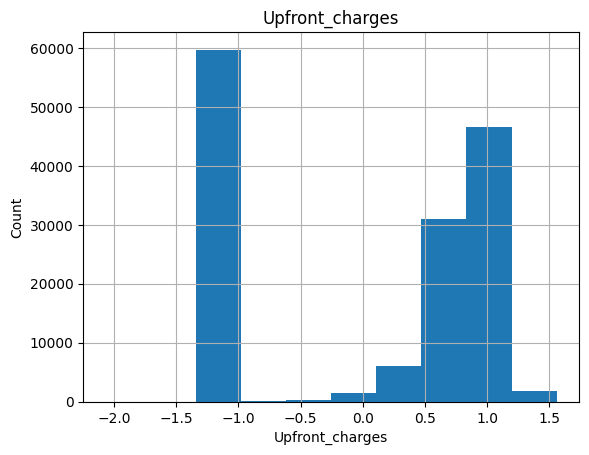

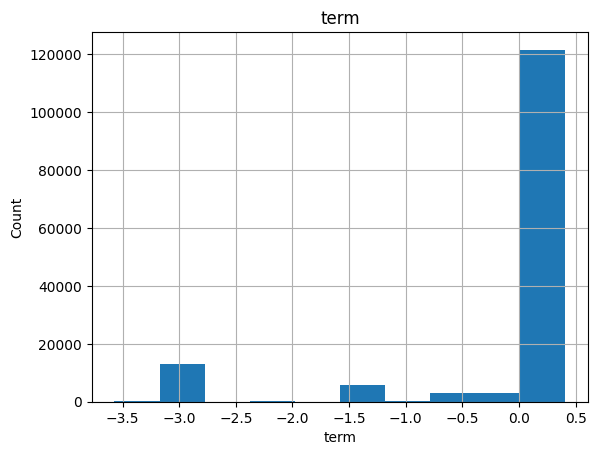

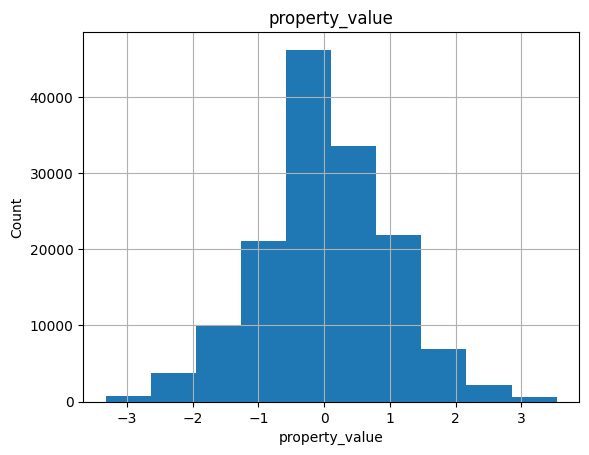

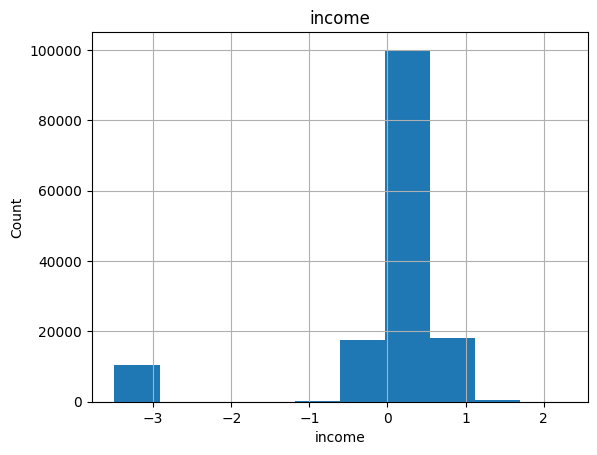

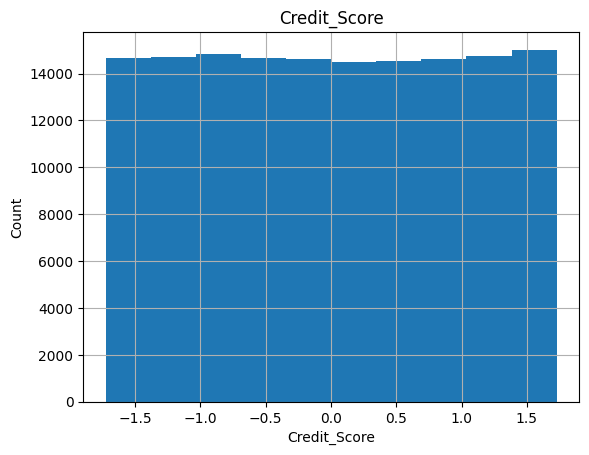

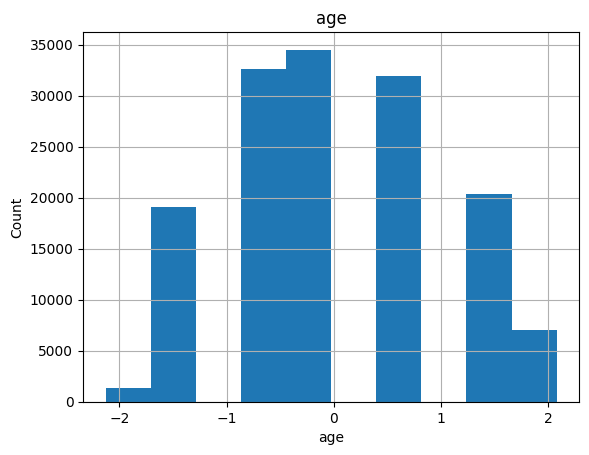

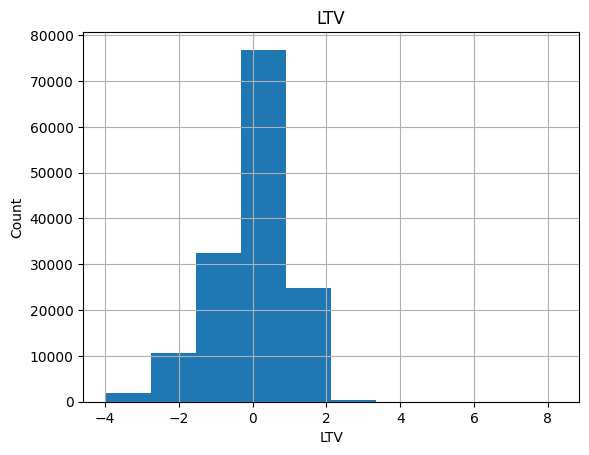

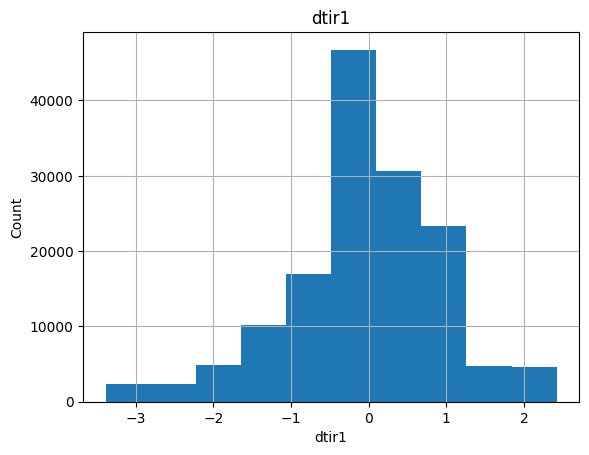

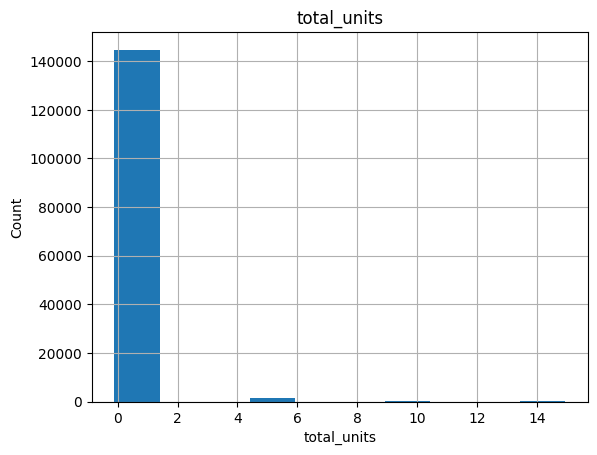

In [ ]:
for feature in numerical:
    df_eng[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [ ]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
data.drop('year',axis =1 ,inplace = True)

In [ ]:
df_eng.drop('ID',axis =1 ,inplace =True)

In [ ]:
df_eng

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,age,LTV,dtir1,total_units
0,-1.585053,-0.027380,-0.723178,-1.184341,0.408392,-2.099468,-0.249037,0.502170,-1.497350,1.406197,0.761658,-0.109555
1,-0.574140,-0.027380,-0.723178,-1.184341,0.408392,-0.446041,0.208523,-1.275282,0.607315,0.424872,-0.067952,-0.109555
2,0.621988,1.100319,-0.254835,0.426068,0.408392,0.416302,0.488641,1.157929,-0.795795,0.355798,0.865359,-0.109555
3,0.826860,0.505746,0.733203,-1.184341,0.408392,0.862178,0.586838,-0.973288,-0.094240,-0.241727,0.450554,-0.109555
4,1.572986,-0.006241,-0.040795,-1.184341,0.408392,1.105997,0.530614,-0.843862,-1.497350,1.022047,0.139450,-0.109555
...,...,...,...,...,...,...,...,...,...,...,...,...
146867,0.747739,-2.091023,-0.137544,1.136364,-2.890503,0.725980,0.407099,-0.352043,0.607315,-0.106092,1.072762,-0.109555
146868,1.269408,2.193221,1.089389,-1.184341,0.408392,1.172890,0.365294,-1.128599,-1.497350,0.041913,-2.349382,14.951866
146869,0.787743,-2.091023,-0.498045,0.608439,-2.890503,1.036404,0.350416,0.018979,-0.094240,-0.693374,1.176463,-0.109555
146870,-0.661804,-1.133940,0.530665,0.925992,-2.890503,-0.622650,0.365294,0.320973,0.607315,-0.168372,-0.897563,-0.109555


In [ ]:
to_encode = [i for i in data.columns if data[i].dtype =='object']
to_encode

['Gender',
 'loan_type',
 'loan_purpose',
 'occupancy_type',
 'credit_type',
 'Region']

In [ ]:
for i in to_encode:
  print(i, data[i].nunique(), data[i].unique(), sep='\t\t')

Gender		4		['Sex Not Available' 'Male' 'Joint' 'Female']
loan_type		3		['type1' 'type2' 'type3']
loan_purpose		4		['p1' 'p4' 'p3' 'p2']
occupancy_type		3		['pr' 'sr' 'ir']
credit_type		4		['EXP' 'EQUI' 'CRIF' 'CIB']
Region		4		['south' 'North' 'central' 'North-East']


In [ ]:
data['Gender'].replace(['Sex Not Available'],[np.nan],inplace=True)


In [ ]:
for i in to_encode:
  print(i, data[i].nunique(), data[i].unique(), sep='\t\t')

Gender		3		[nan 'Male' 'Joint' 'Female']
loan_type		3		['type1' 'type2' 'type3']
loan_purpose		4		['p1' 'p4' 'p3' 'p2']
occupancy_type		3		['pr' 'sr' 'ir']
credit_type		4		['EXP' 'EQUI' 'CRIF' 'CIB']
Region		4		['south' 'North' 'central' 'North-East']


<Axes: >

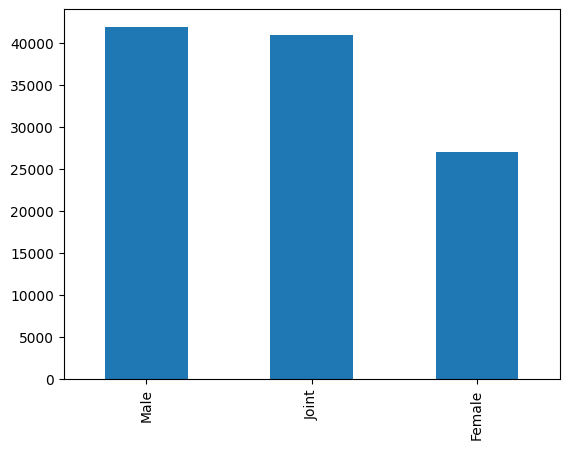

In [ ]:
data['Gender'].value_counts().plot(kind='bar')

In [ ]:
data['Gender'].mode()


0    Male
Name: Gender, dtype: object

In [ ]:
data['Gender'].fillna('Male',inplace=True)

In [ ]:
for i in to_encode:
  print(i, data[i].nunique(), data[i].unique(), sep='\t\t')

Gender		3		['Male' 'Joint' 'Female']
loan_type		3		['type1' 'type2' 'type3']
loan_purpose		4		['p1' 'p4' 'p3' 'p2']
occupancy_type		3		['pr' 'sr' 'ir']
credit_type		4		['EXP' 'EQUI' 'CRIF' 'CIB']
Region		4		['south' 'North' 'central' 'North-East']


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols =data.select_dtypes(include=['object']).columns
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))

In [ ]:
data.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,0,2,0,0,0,0,0,0,11.665647,...,3,758,0,29,0,98.728814,3,0,1,45.0
1,24891,0,2,0,1,0,0,0,1,12.238056,...,2,552,1,59,0,81.250000,0,0,1,37.0
2,24892,0,2,1,0,0,0,0,0,12.915339,...,3,834,0,39,0,80.019685,3,0,0,46.0
3,24893,0,2,0,0,3,0,0,0,13.031344,...,3,587,0,49,1,69.376900,0,0,0,42.0
4,24894,0,1,1,0,0,0,0,0,13.453823,...,1,602,1,29,1,91.886544,0,0,0,39.0


In [ ]:
X=data.drop('Status',axis='columns')
Y=data.Status

In [ ]:
X

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,24890,0,2,0,0,0,0,0,0,11.665647,...,7.461640,3,758,0,29,0,98.728814,3,0,45.0
1,24891,0,2,0,1,0,0,0,1,12.238056,...,8.513185,2,552,1,59,0,81.250000,0,0,37.0
2,24892,0,2,1,0,0,0,0,0,12.915339,...,9.156940,3,834,0,39,0,80.019685,3,0,46.0
3,24893,0,2,0,0,3,0,0,0,13.031344,...,9.382612,3,587,0,49,1,69.376900,0,0,42.0
4,24894,0,1,1,0,0,0,0,0,13.453823,...,9.253400,1,602,1,29,1,91.886544,0,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,0,2,0,0,2,0,0,0,12.986544,...,8.969542,0,659,1,59,0,71.792763,3,0,48.0
148666,173556,0,2,0,0,0,0,0,0,13.281928,...,8.873468,0,569,0,29,1,74.428934,3,0,15.0
148667,173557,0,2,0,0,3,0,0,0,13.009195,...,8.839277,0,702,1,49,1,61.332418,0,0,49.0
148668,173558,0,0,0,0,3,0,0,0,12.188418,...,8.873468,3,737,1,59,0,70.683453,0,0,29.0


In [ ]:
Y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: Status, Length: 146872, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=True)

LOGISTICS REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
logreg_model = LogisticRegression(random_state=42)

In [ ]:
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = logreg_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print("Logistic Regression Model Results:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Logistic Regression Model Results:
Accuracy: 0.8382

Confusion Matrix:
[[19406  2718]
 [ 2034  5217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     22124
           1       0.66      0.72      0.69      7251

    accuracy                           0.84     29375
   macro avg       0.78      0.80      0.79     29375
weighted avg       0.84      0.84      0.84     29375



RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)


In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display the results
print("Random Forest Model Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(classification_rep_rf)

Random Forest Model Results:
Accuracy: 0.9999

Confusion Matrix:
[[22123     1]
 [    1  7250]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22124
           1       1.00      1.00      1.00      7251

    accuracy                           1.00     29375
   macro avg       1.00      1.00      1.00     29375
weighted avg       1.00      1.00      1.00     29375

